# Data Plotting

This notebook provides a tutorial for plotting the output of tidy3d simulations.

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.append('../../tidy3d')
import tidy3d as td
import tidy3d.web as web

## Setup

### Creating Simulation

First, let's make a `td.Simulation` so we have data to plot.

In [2]:
# make samplers that define the freq and time domain measurement
freqs = np.linspace(1e14, 3e14, 101)
num_modes = 3

Lx, Ly, Lz = 5, 5, 5

simulation = td.Simulation(
    size=(Lx, Ly, Lz),
    grid_size=(0.02, 0.02, 0.02),
    run_time = 4e-13,
    pml_layers = 3*[td.PML()],
    structures = [
        td.Structure(
            geometry=td.Box(center=(0,0,0), size=(10001,1.5,1.5)),
            medium=td.Medium(permittivity=2),
            name='waveguide'
        ),
        td.Structure(
            geometry=td.Box(center=(0,.5,.5), size=(1.5,1.5,1.5)),
            medium=td.Medium(permittivity=2),
            name='scatterer'
        ),        
    ],
    sources=[td.ModeSource(
        source_time=td.GaussianPulse(freq0=2e14, fwidth=2e13),
        center=(-2.0, 0.0, 0.0),
        size=(0.0, 3, 3),
        direction='+',
        mode=td.Mode(mode_index=0)
    )],
    monitors=[
        td.FieldMonitor(
            fields=['Ex', 'Ey', 'Ez'],
            size=(td.inf, 0, td.inf),
            center=(0,0,0),
            freqs=freqs,
            name='field'),
        td.FieldTimeMonitor(
            size=(td.inf, 0, td.inf),
            center=(0,0,0),
            interval=30,
            name='field_time'),
        td.FluxMonitor(
            size=(0,3,3),
            center=(2,0,0),
            freqs=freqs, 
            name='flux'),
        td.FluxTimeMonitor(
            size=(0,3,3),
            center=(2,0,0),
            interval=10,
            name='flux_time'),
        td.ModeMonitor(
            size=(0,3,3),
            center=(2,0,0),
            freqs=freqs,
            modes=[td.Mode(mode_index=i) for i in range(num_modes)], 
            name='mode')
    ],
)

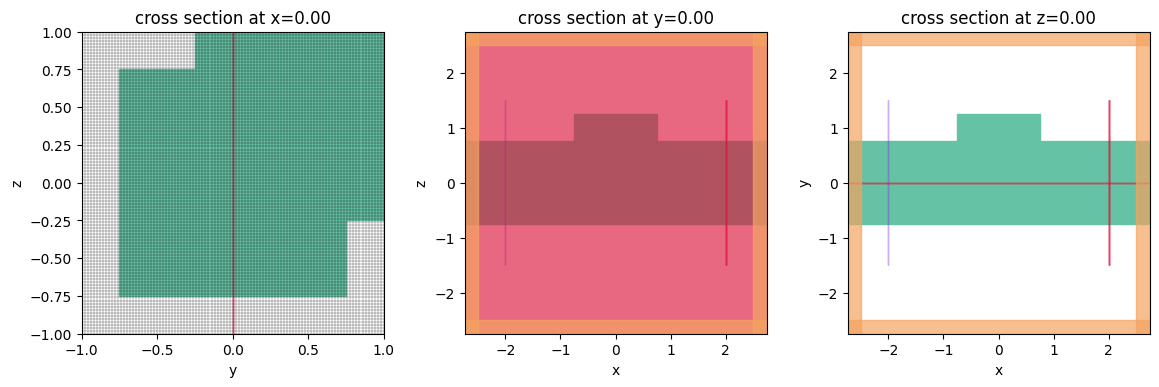

In [3]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
simulation.plot(x=0.0, ax=ax1)
simulation.plot_grid(x=0, ax=ax1)
ax1.set_ylim(-1, 1)
ax1.set_xlim(-1, 1)
simulation.plot(y=0.0, ax=ax2)
simulation.plot(z=0.0, ax=ax3)
plt.show()

In [4]:
# get rid of scatterer for normalization 
simulation0 = simulation.copy(deep=True)
simulation0.structures = [simulation.structures[0]]

# sim0_data = web.run(simulation0, task_name='straight waveguide', path='data/simulation.hdf5')
# sim_data = web.run(simulation, task_name='scattered waveguide', path='data/simulation.hdf5')
sim0_data = web.load('c79d3353-5963-4354-9726-177a9dce0be6', simulation, path='data/simulation.hdf5')
sim_data = web.load('3b12940b-081b-4dbc-a7ec-adf21449f41a', simulation, path='data/simulation.hdf5')

print(sim_data.log)

[15:50:16] INFO     downloading file "simulation.json" to                       ]8;id=615607;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/simulation.json"

Output()

[15:50:17] INFO     downloading file "monitor_data.hdf5" to                     ]8;id=815248;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/monitor_data.hdf5"

Output()

[15:50:42] INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=102146;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393

Output()

[15:50:44] INFO     exporting SimulationData to data/simulation.hdf5            ]8;id=729817;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:266

           INFO     loading SimulationData from data/simulation.hdf5            ]8;id=576477;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:302

[15:50:45] INFO     downloading file "simulation.json" to                       ]8;id=733895;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/simulation.json"

Output()

           INFO     downloading file "monitor_data.hdf5" to                     ]8;id=228064;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/monitor_data.hdf5"

Output()

[15:51:10] INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=130038;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393

Output()

[15:51:11] INFO     exporting SimulationData to data/simulation.hdf5            ]8;id=109791;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:266

           INFO     loading SimulationData from data/simulation.hdf5            ]8;id=639395;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:302

Simulation domain Nx, Ny, Nz: [274, 274, 274]
Applied symmetries: [0, 0, 0]
Number of computational grid points: 2.0571e+07.
Using subpixel averaging: True
Number of time steps: 11540
Automatic shutoff factor: 1.00e-05
Time step (s): 3.4665e-17

Get source modes time (s):    3.5969
Get monitor modes time (s):   12.2554
Rest of setup time (s):       0.1042

Starting solver...
- Time step    461 / time 1.60e-14s (  4 % done), field decay: 1.00e+00
- Time step    923 / time 3.20e-14s (  8 % done), field decay: 1.00e+00
- Time step   1148 / time 3.98e-14s (  9 % done), field decay: 1.00e+00
- Time step   1384 / time 4.80e-14s ( 12 % done), field decay: 1.00e+00
- Time step   1846 / time 6.40e-14s ( 16 % done), field decay: 4.26e-01
- Time step   2307 / time 8.00e-14s ( 20 % done), field decay: 1.73e-03
- Time step   2769 / time 9.60e-14s ( 24 % done), field decay: 2.18e-06
Field decay smaller than shutoff factor, exiting solver.

Solver time (s):              6.1193
Post-processing time (s

## Plotting

Here we show how to plot data from each monitor

### Flux Data

`td.FluxData` and `td.FluxTimeData` is the simplest because it just stores the electromagnetic power flux through a surface as a function of the frequency and time, respectively.

First, we access the `td.MonitorData` through the dictionary `sim_data.monitor_data`.

In [5]:
# get the flux data from that monitor name
flux_data = sim_data['flux']
flux_time_data = sim_data['flux_time']
flux_transmission =  sim_data['flux'] / sim0_data['flux']

and we can plot the values using the `td.MonitorData.plot()` method.

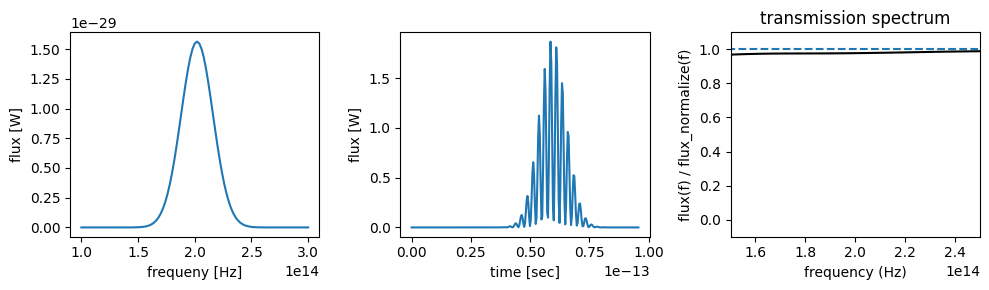

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(10,3))
flux_data.plot(ax=ax1)
flux_time_data.plot(ax=ax2)
flux_transmission.plot(ax=ax3, color='k')
ax3.plot(flux_data.f, np.ones_like(flux_data.f), '--')

ax3.set_ylabel('flux(f) / flux_normalize(f)')
ax3.set_xlabel('frequency (Hz)')
ax3.set_title('transmission spectrum')
ax3.set_xlim(150e12, 250e12)
ax3.set_ylim(-0.1, 1.1)
plt.show()

## Plotting Mode Data

The axes of mode data correspond to direction (+/-), mode_index, and sampler axes. 

To pot all of this data, we make two subplots and use the builting `.sel()` function to select the data to plot in each axis.

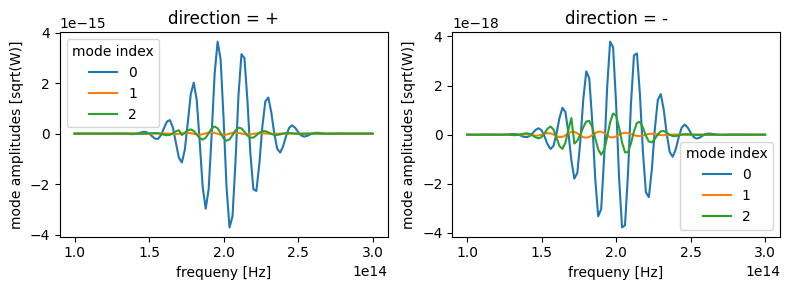

In [7]:
# tip: you can also get the monitor data directly by indexing it's name in `SimulationData`
mode_data = sim_data['mode'] 

f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(8, 3))

mode_data.sel(direction='+').real.plot.line(x='f', ax=ax1)
mode_data.sel(direction='-').real.plot.line(x='f', ax=ax2)
plt.show()


### Plotting Fields

Let's grab the field data and plot.

In [8]:
field_data = sim_data['field']
field0_data = sim0_data['field']

#### Electromagnetic Fields

In [9]:
# get the field data on the z=1.0 plane at frequency 200THz
Ey_data = field_data.Ey.interp(f=200e12).isel(y=0)
Ey0_data = field0_data.Ey.interp(f=200e12).isel(y=0)

##### Amplitude Plots

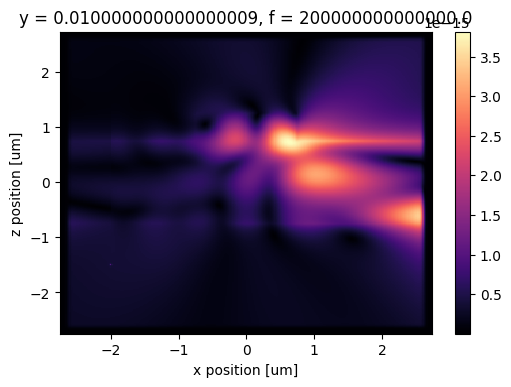

In [10]:
# amplitude plot rz Ex(x,y) field on plane
Ey_data.pipe(abs).plot(x='x', y='z', cmap='magma')
plt.show()

##### Quiver Plots

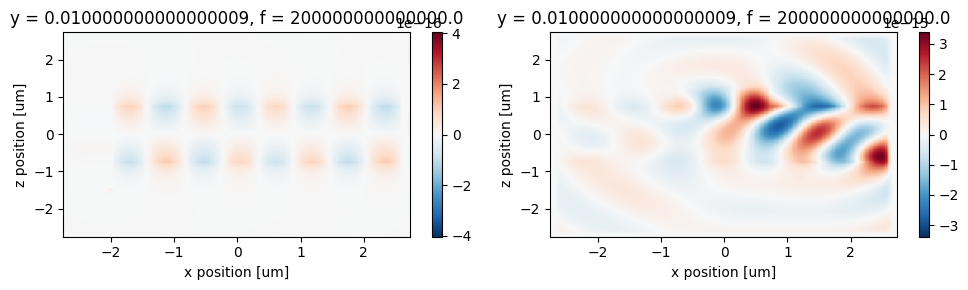

In [11]:
# quiver plot of E_{x,y}(x,y) on plane with Ez(x,y) underlying.
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(10, 3))

Ey0_data.real.plot(x='x', y='z', ax=ax1)
Ey_data.real.plot(x='x', y='z', ax=ax2)

plt.show()

### Stream Plots

In [13]:
field0_data_c = sim0_data.at_centers('field').interp(f=200e12)
field_data_c = sim_data.at_centers('field').interp(f=200e12)

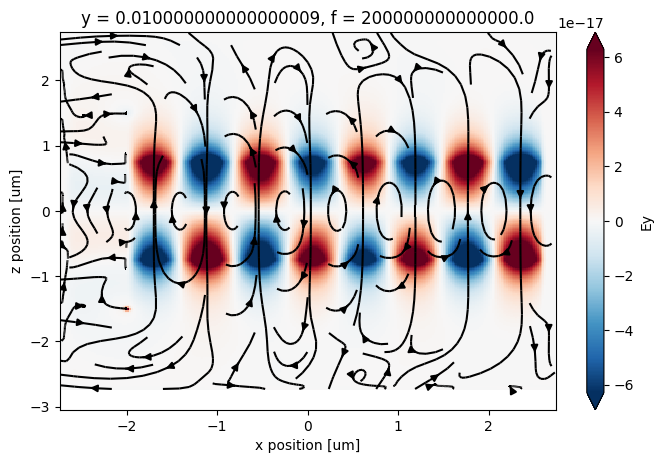

In [15]:
# quiver plot of E_{x,y}(x,y) on plane with Ez(x,y) underlying.
f, ax = plt.subplots(figsize=(8, 5))
field0_data_c.Ey.real.plot.imshow(x='x', y='z', ax=ax, robust=True)
field0_data_c.real.plot.streamplot('x', 'z', 'Ex', 'Ez', ax=ax, color='k')
plt.show()

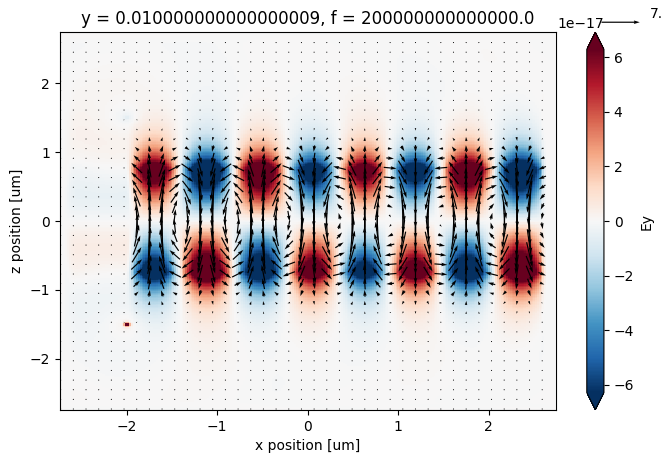

In [16]:
# quiver plot of E_{x,y}(x,y) on plane with Ez(x,y) underlying.
f, ax = plt.subplots(figsize=(8, 5))
resampled = field0_data_c.sel(x=slice(None,None, 7), z=slice(None,None, 7))
field0_data_c.Ey.real.plot.imshow(x='x', y='z', ax=ax, robust=True)
resampled.real.plot.quiver('x', 'z', 'Ex', 'Ez', ax=ax)
plt.show()

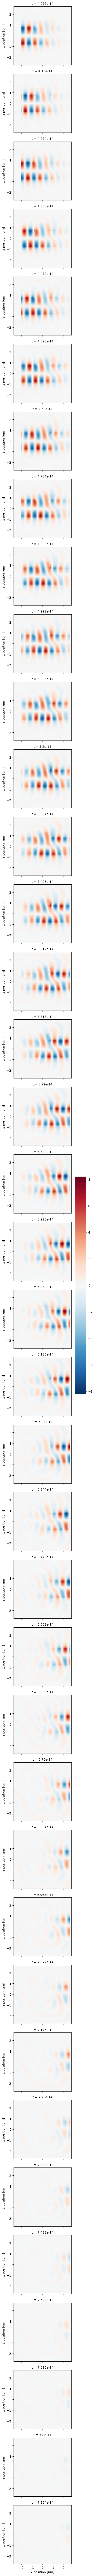

In [17]:
field_time_data = sim_data['field_time']

time_data = field_time_data.Ex.sel(y=0, t=slice(4e-14, 8e-14))

_ = time_data.T.plot(row='t')

In [ ]:
sim_data['field_time.coords.y

##### Structure Overlay
One can overlay the structure permittivity by calling `plot_fields` from the `td.SimulationData` object as follows:

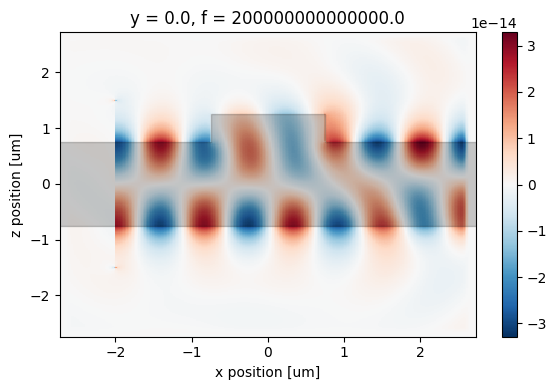

In [22]:
ax = sim_data.plot_field('field', 'Ex', y=0., time=5e-14, freq=200e12, eps_alpha=0.2)

[15:53:59] INFO     Animation.save using <class                             ]8;id=981196;file:///usr/local/lib/python3.9/site-packages/matplotlib/animation.py\animation.py]8;;\:1134
                    'matplotlib.animation.HTMLWriter'>

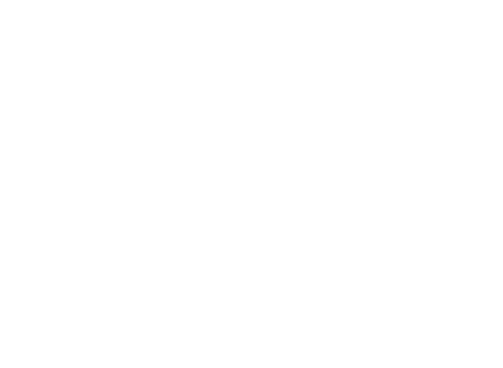

In [18]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

# Set up formatting for the movie files
Writer = animation.writers['html']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

def update_plot(num, ax):
    time_data = field_time_data.Ex.sel(y=0)
    time_data.isel(t=num)
    im = time_data.T.plot(ax=ax)
    return (ax,)

f, ax = plt.subplots()
line_ani = animation.FuncAnimation(f, update_plot, len(field_time_data.Ex.coords['t']), fargs=(ax,), blit=True)
line_ani.save('lines.html', writer=writer)
!open lines.html

#### Permittivity

If we've stored permittivity by specifing `eps_xx`, `eps_yy` or `eps_zz` in the `FieldMonitor`'s `fields`, we can access them and plot as follows.

In [19]:
!open lines.html

In [ ]:
# eps_xx = field_data.eps_xx
# xx_component_plane = eps_xx.interp(z=1.0, f=7.5)
# xx_component_plane.real.plot(cmap='gist_yarg')
# plt.show()

## Tricks and Tips

Keyword arguments are passed to the correponding `.plot()` calls internally, so you can customize the plots.

In [ ]:
sim_data['flux'].plot(color='brown', linestyle='-.', label='custom line')
plt.legend()
plt.title('custom plot')
plt.show()